In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(x_train,x_test),(y_train,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

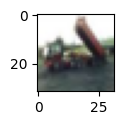

In [10]:
plot_sample(2)

In [11]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [21]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Check shapes
print("y_train shape before flattening:", y_train.shape)
print("y_test shape before flattening:", y_test.shape)

# Flatten the labels to 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Convert to one-hot encoding
num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

print("y_train_categorical shape:", y_train_categorical.shape)
print("y_test_categorical shape:", y_test_categorical.shape)


y_train shape before flattening: (50000, 1)
y_test shape before flattening: (10000, 1)
y_train_categorical shape: (50000, 10)
y_test_categorical shape: (10000, 10)


In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 388s 247ms/step - accuracy: 0.2706 - loss: 2.2916
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 470s 266ms/step - accuracy: 0.3987 - loss: 1.6750
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 403s 258ms/step - accuracy: 0.4308 - loss: 1.5829
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 437s 255ms/step - accuracy: 0.4521 - loss: 1.5255
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 441s 255ms/step - accuracy: 0.4703 - loss: 1.4832


In [25]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 1.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 9.832282e-01,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 6.325861e-38, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [27]:
model.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4249 - loss: 190.9377


[190.2212677001953, 0.4251999855041504]